In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import warnings 
warnings.filterwarnings('ignore')

# Load the Dataset

In [3]:
df = pd.read_csv("Dataset/Churn_Modelling.csv")

In [4]:
df.head(7)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0


In [5]:
df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# Univariate Analysis

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

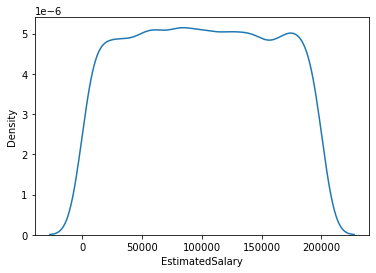

In [6]:
sns.distplot(df['EstimatedSalary'], hist=False)

<AxesSubplot:xlabel='Age', ylabel='Density'>

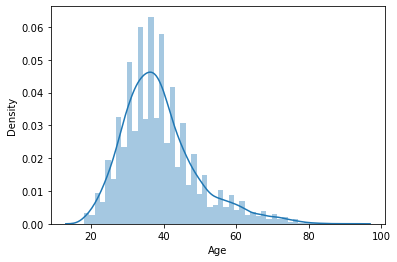

In [7]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='count'>

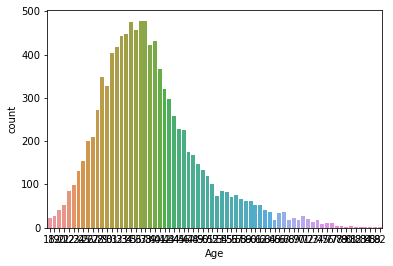

In [8]:
sns.countplot(df['Age'])

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

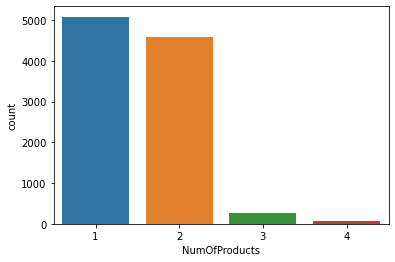

In [9]:
sns.countplot(df['NumOfProducts'])

<AxesSubplot:ylabel='Geography'>

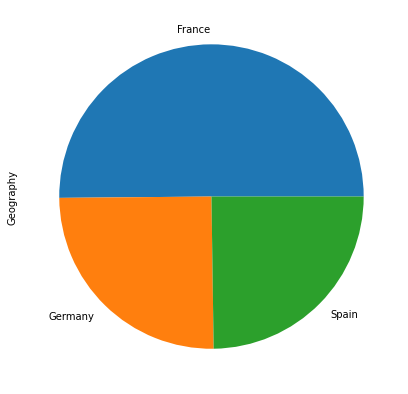

In [10]:
df['Geography'].value_counts().plot(kind='pie', figsize=(7,7))

<AxesSubplot:xlabel='Tenure', ylabel='count'>

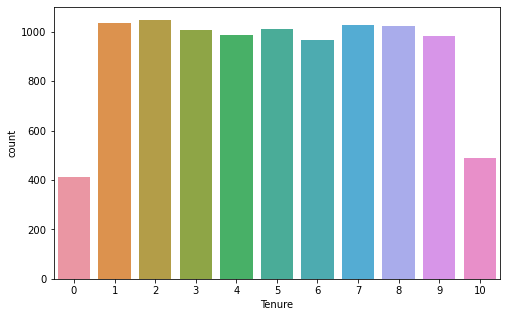

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(df['Tenure'])

<AxesSubplot:ylabel='Geography'>

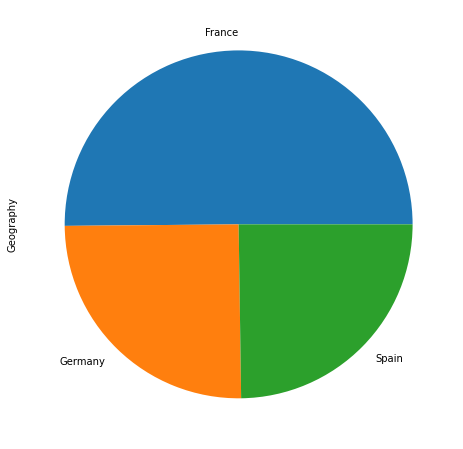

In [12]:
df['Geography'].value_counts().plot(kind="pie",figsize=(10,8))

<AxesSubplot:ylabel='Frequency'>

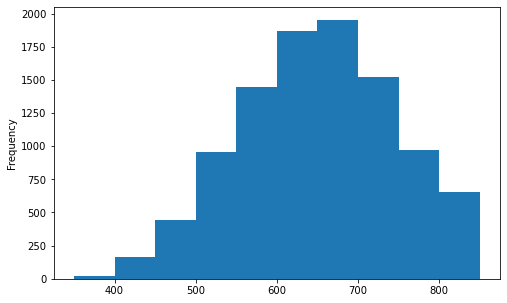

In [13]:
df['CreditScore'].plot(kind="hist",figsize=(8,5))

# Bivariate Analysis

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

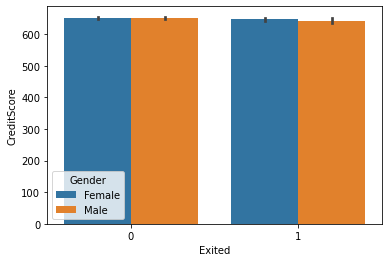

In [14]:
sns.barplot(df.Exited, df.CreditScore, hue=df.Gender)

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

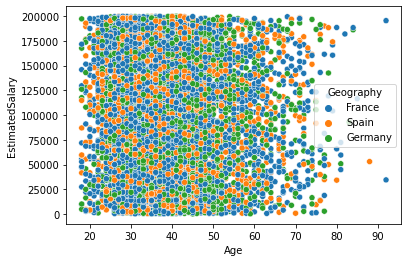

In [15]:
sns.scatterplot(df.Age, df.EstimatedSalary, hue=df.Geography)

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

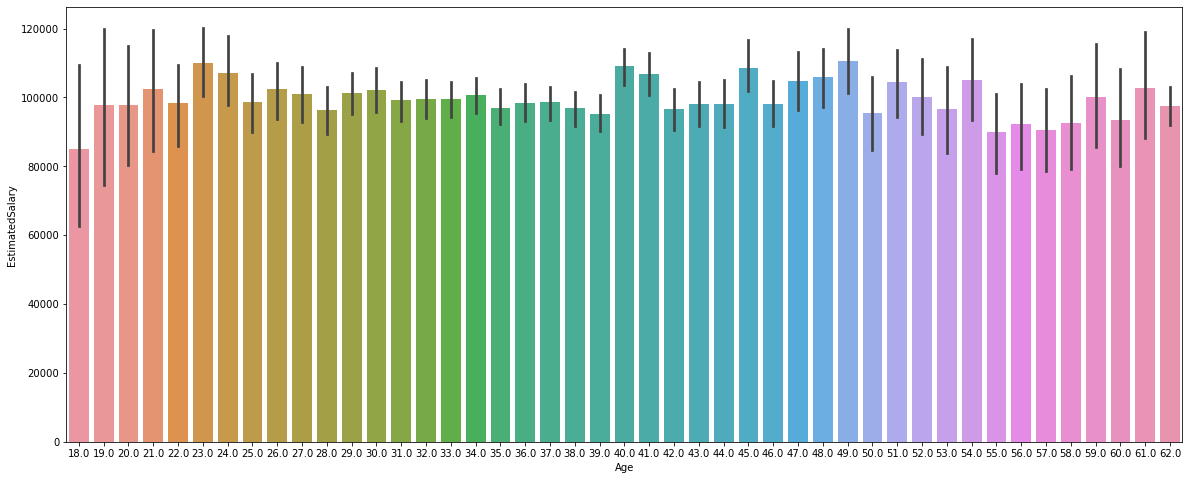

In [39]:
plt.figure(figsize=(20,8))
sns.barplot(df.Age, df.EstimatedSalary)

<AxesSubplot:xlabel='Geography', ylabel='EstimatedSalary'>

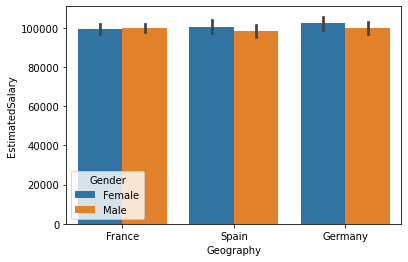

In [17]:
sns.barplot(df.Geography, df.EstimatedSalary, hue=df.Gender)

# Multivariate Analysis

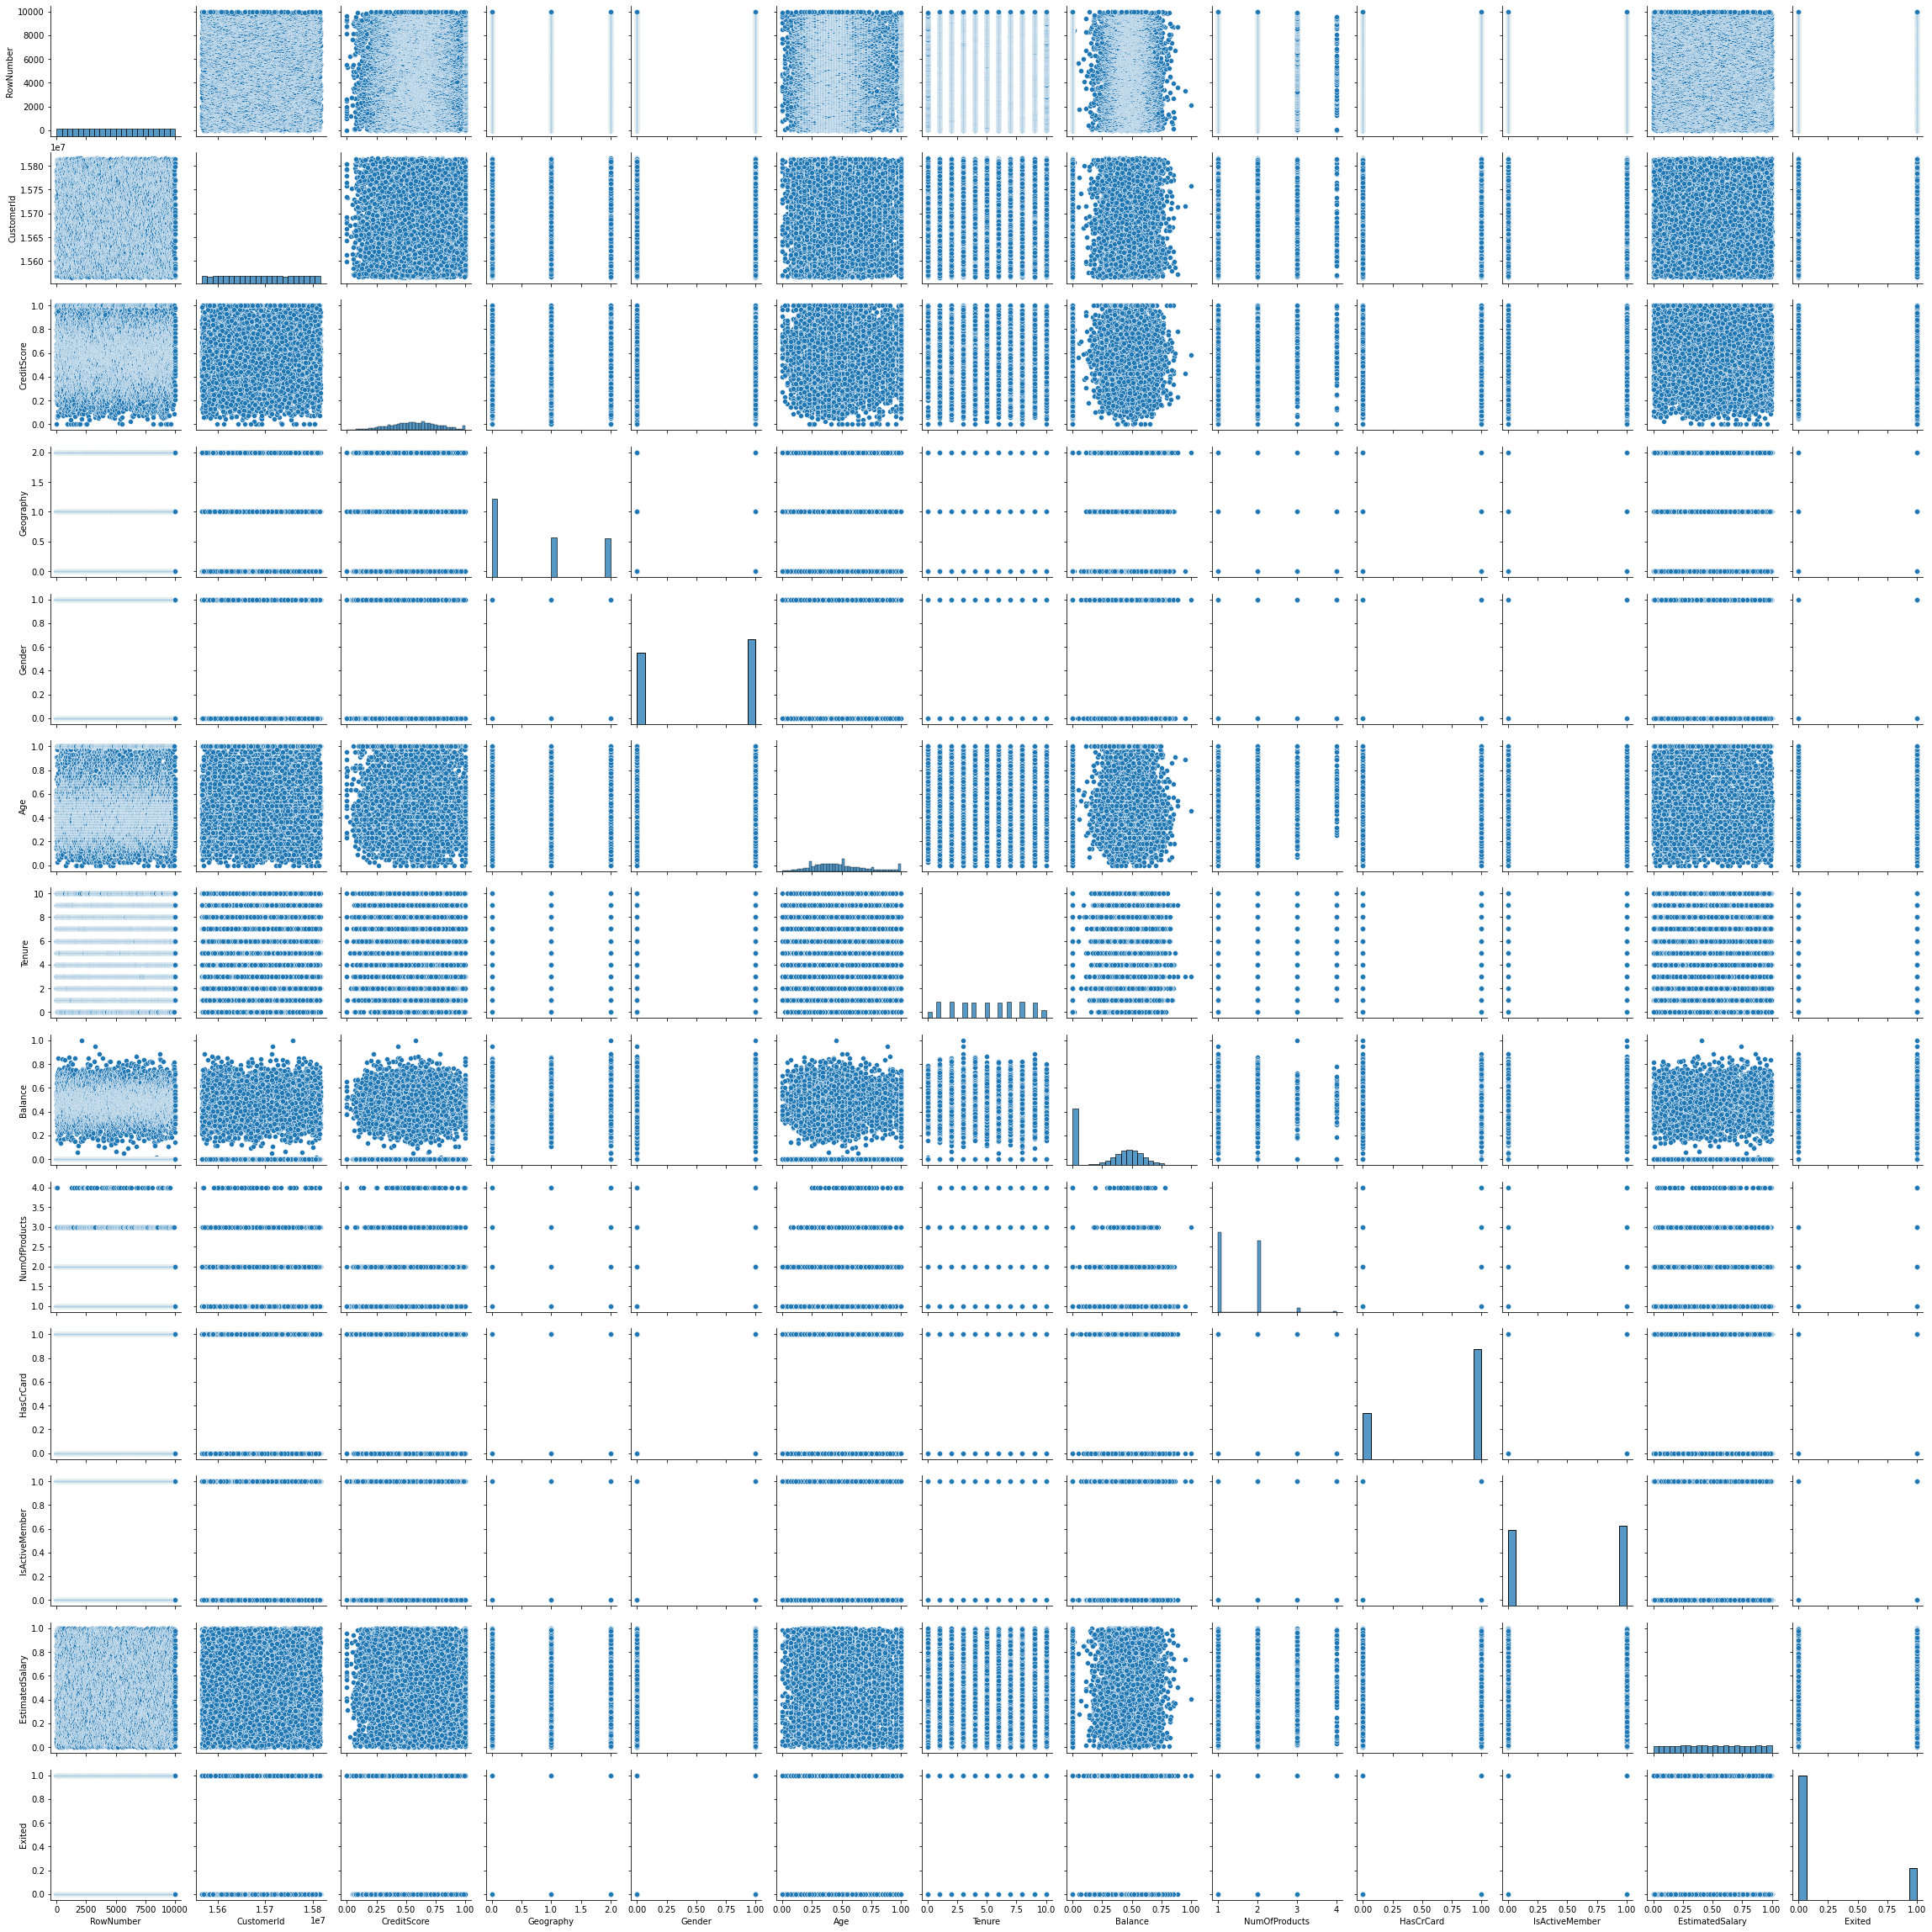

In [69]:
sns.pairplot(df)

Gender  Geography
Female  France       2261
        Germany      1193
        Spain        1089
Male    France       2753
        Spain        1388
        Germany      1316
Name: Geography, dtype: int64


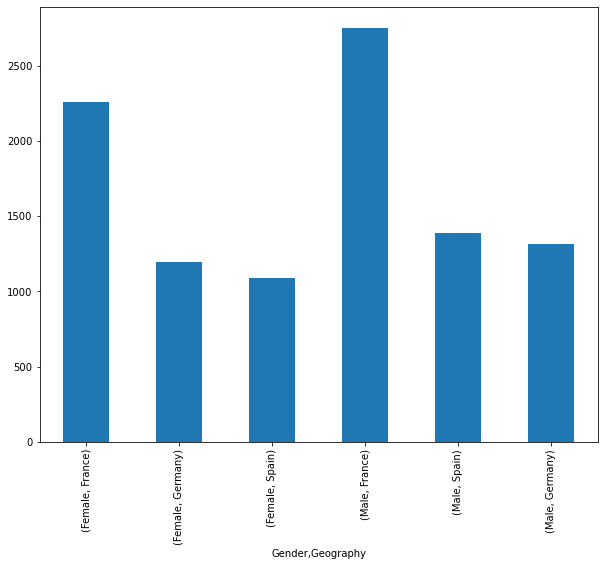

In [18]:
gp1 = df.groupby('Gender')['Geography'].value_counts()
gp1.plot(kind='bar',figsize=(10,8))
print(gp1)

In [19]:
df.groupby('Gender')['Age'].mean()

Gender
Female    39.238389
Male      38.658237
Name: Age, dtype: float64

In [20]:
df.groupby('Gender')['EstimatedSalary'].mean()

Gender
Female    100601.541382
Male       99664.576931
Name: EstimatedSalary, dtype: float64

In [21]:
df.groupby('Exited')['Balance','CreditScore'].mean()

,Balance,CreditScore
Exited,,
0,72745.296779,651.853196
1,91108.539337,645.351497


HasCrCard  IsActiveMember  Geography
0          0               France        706
                           Spain         352
                           Germany       343
           1               France        765
                           Spain         404
                           Germany       375
1          0               France       1717
                           Germany       918
                           Spain         813
           1               France       1826
                           Spain         908
                           Germany       873
Name: Geography, dtype: int64


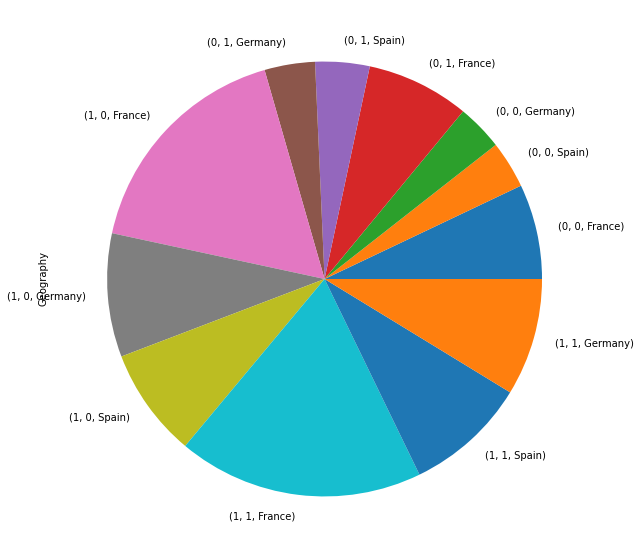

In [22]:
gp = df.groupby(['HasCrCard','IsActiveMember'])['Geography'].value_counts()
gp.plot(kind='pie',figsize=(10,10))
print(gp)

Geography  Exited  Gender
France     0       Male      2403
                   Female    1801
           1       Female     460
                   Male       350
Germany    0       Male       950
                   Female     745
           1       Female     448
                   Male       366
Spain      0       Male      1206
                   Female     858
           1       Female     231
                   Male       182
Name: Gender, dtype: int64


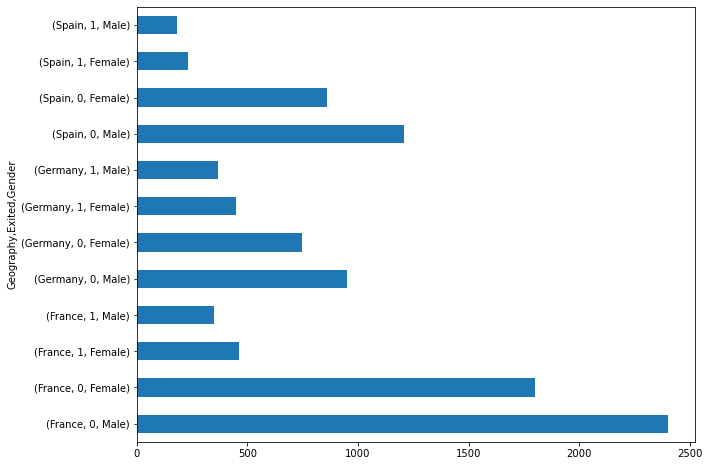

In [23]:
gp8 = df.groupby(['Geography','Exited'])['Gender'].value_counts()
gp8.plot(kind='barh',figsize=(10,8))
print (gp8)

# Descriptive Statistics

In [24]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Handling Missing values

In [25]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

## No missing values in the dataset

# Finding Outliers

In [26]:
def replace_outliers(df, field_name):
    Q1 = np.percentile(df[field_name],25,interpolation='midpoint')
    Q3 = np.percentile(df[field_name],75,interpolation='midpoint')
    IQR = Q3-Q1
    maxi = Q3+1.5*IQR
    mini = Q1-1.5*IQR
    df[field_name]=df[field_name].mask(df[field_name]>maxi,maxi)
    df[field_name]=df[field_name].mask(df[field_name]<mini,mini)

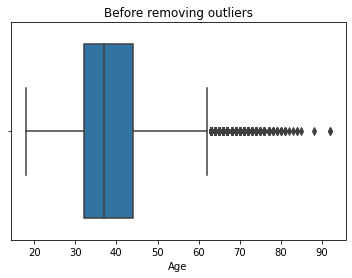

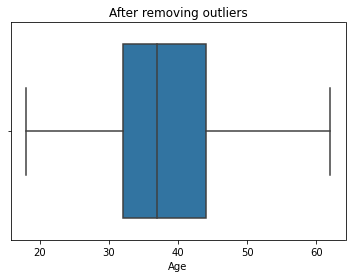

In [27]:
plt.title("Before removing outliers")
sns.boxplot(df['Age'])
plt.show()
plt.title("After removing outliers")
replace_outliers(df, 'Age')
sns.boxplot(df['Age'])
plt.show()

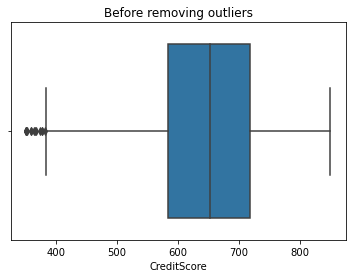

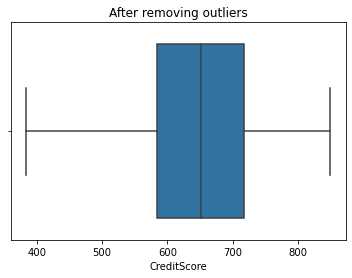

In [28]:
plt.title("Before removing outliers")
sns.boxplot(df['CreditScore'])
plt.show()
plt.title("After removing outliers")
replace_outliers(df, 'CreditScore')
sns.boxplot(df['CreditScore'])
plt.show()

# Check for categorical column and perform Encoding 

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [41]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])

In [43]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,2,0,43.0,2,125510.82,1,1,1,79084.10,0


# Spliting the data into dependent and independent variables

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

df['Geography'].unique()
ct= ColumnTransformer([('oh', OneHotEncoder(), [4])], remainder="passthrough")

x=df.iloc[:,0:12].values
y=df.iloc[:,12:14].values
x=ct.fit_transform(x)
xsns.pairplot(df)

array([[1.0, 0.0, 0.0, ..., 1, 1, 1],
       [0.0, 0.0, 1.0, ..., 1, 0, 1],
       [1.0, 0.0, 0.0, ..., 3, 1, 0],
       ...,
       [1.0, 0.0, 0.0, ..., 1, 0, 1],
       [0.0, 1.0, 0.0, ..., 2, 1, 0],
       [1.0, 0.0, 0.0, ..., 1, 1, 0]], dtype=object)

# Scaling the data values 

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [49]:
df['CreditScore'] = scaler.fit_transform(pd.DataFrame(df['CreditScore']))
df['Age'] = scaler.fit_transform(pd.DataFrame(df['Age']))
df['Balance'] = scaler.fit_transform(pd.DataFrame(df['Balance']))
df['EstimatedSalary'] = scaler.fit_transform(pd.DataFrame(df['EstimatedSalary']))

In [50]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,0.505353,0,0,0.545455,2,0.000000,1,1,1,0.506735,1
1,2,15647311,Hill,0.481799,2,0,0.522727,1,0.334031,1,0,1,0.562709,0
2,3,15619304,Onio,0.254818,0,0,0.545455,8,0.636357,3,1,0,0.569654,1
3,4,15701354,Boni,0.676660,0,0,0.477273,1,0.000000,2,0,0,0.469120,0
4,5,15737888,Mitchell,1.000000,2,0,0.568182,2,0.500246,1,1,1,0.395400,0


# Split the data into Train and Test set

In [51]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['IsActiveMember'], axis=1), df['IsActiveMember'], test_size=0.30, random_state=7)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 13)
(3000, 13)
(7000,)
(3000,)


In [58]:
X_train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited
2317,2318,15627212,Smith,0.528908,0,0,0.409091,2,0.440077,1,1,0.244890,0
259,260,15607178,Welch,1.000000,1,1,0.454545,3,0.218818,1,1,0.700387,0
584,585,15803689,Begum,0.565310,1,0,0.750000,1,0.477253,2,0,0.274741,1
475,476,15591986,Johnston,0.509636,1,1,0.636364,6,0.562294,1,0,0.172863,1
9156,9157,15679551,Colombo,0.259101,2,0,0.636364,2,0.652715,1,1,0.825634,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,920,15733114,Hay,0.361884,2,1,0.613636,9,0.000000,2,1,0.133718,0
4307,4308,15702499,Schnaars,0.828694,2,1,0.636364,9,0.759982,1,1,0.073576,0
5699,5700,15624667,Wallace,0.644540,0,1,0.386364,6,0.541541,1,1,0.436081,0
537,538,15739803,Lucciano,0.648822,2,1,0.363636,9,0.000000,2,1,0.637852,0


In [63]:
y_train

2317    1
259     1
584     0
475     0
9156    1
       ..
919     0
4307    1
5699    1
537     0
9412    0
Name: IsActiveMember, Length: 7000, dtype: int64

# Assignment 2 completed by Mohnish S (2019504551) on September 23rd, 2022.